In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test) =  fashion_mnist.load_data()

In [7]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
import numpy as np

np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [10]:
import matplotlib.pyplot as plt

In [21]:
index = np.where(y_train == 0)[0][0]

1

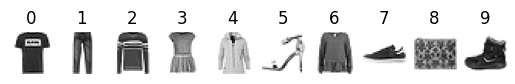

In [23]:
# 각 클래스별 1개씩 10개 그리기
for i in range(10):
  plt.subplot(1,10,i+1)
  index = np.where(y_train == i)[0][0]
  plt.imshow(x_train[index],cmap='gray_r')
  plt.title(y_train[index])
  plt.axis('off')
plt.show()

데이터의 규격을 맞춘다
  - 이미지는 255범위 안에서만 각 픽셀이 표현  / 255

In [24]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

로지스틱 회귀로 패션 아이템을 분류
  - 로지스틱함수(시그모이드)를 적용한 알고리즘
  - LogisticRegression, SGDClassifier

In [25]:
# 교차검증을 통해 두개 모델을 빠르게 성능확인

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [27]:
lr,sgdc = LogisticRegression(), SGDClassifier()

In [ ]:
from sklearn.model_selection import cross_validate
